<a id="head"></a>

# Introduction
With the intention to open a small robot-run cafe in Los Angeles, and attracting investors who are interested.

## Project goal
Our goal is to study the market and determine if the robot-run cafe will have a long lasting success.

### [link to the presentation](https://drive.google.com/file/d/1-ExBsjwyb4k9Yg_JiPrtFtqnTspVoxRW/view?usp=sharing)

### Table of Contents
- [Introduction](#head)
- [Import ibraries and data](#import)
- [A look at the data](#alookat)
    - [Conclusions: A look at the data](#alook_c)
- [Preprocessing](#prepro)
    - [Conclusions: Preprocessing](#preprocessing_c)
- [Analysis](#Analysis)
- [Analysis conclusions and general recommendations](#overall)

<a id="import"></a>
[Back to table of contents](#head)

### library importing, and file reading:

In [1]:
#Importing libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading files:
rest = (pd.read_csv('rest_data_us.csv', dtype = {'object_type' : 'category'})
            .rename(columns = {'object_name' : 'name', 'object_type' : 'type', 'number' : 'seats'}))

**The data was read in the following format:**

- **dtypes:**
    - object_type dtype as category.

- **names:**
    - object_type renamed to type.
    - object_name renamed to name.
    - number renamed to seats.

<a id="alookat"></a>
[Back to table of contents](#head)

#  A look at the data:
**Rest table description:**
this table has information about the local restaurants, containing the columns:
- **id** — establishment id.
- **name** — establishment name.
- **chain** — chain establishment (TRUE/FALSE).
- **type** — establishment type.
- **address** — address.
- **seats** — number of seats.

In [3]:
rest.sample(5)

,id,name,address,chain,type,seats
3907,15693,ZIA VALENTINA,6333 W 3RD ST #530,False,Restaurant,26
6653,18439,UNCLE JOHN'S CAFE,836 S GRAND AVE,True,Restaurant,32
3132,14918,HO MI BING,3300 W 6TH ST # 2,False,Restaurant,39
8140,19926,KAGURA DOWNTOWN,137 JAPANESE VLG PLZ MALL,False,Restaurant,37
2988,14774,CJ SPA RESTAURANT,620 S UNION AVE,True,Restaurant,37


In [4]:
rest.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       9651 non-null   int64   
 1   name     9651 non-null   object  
 2   address  9651 non-null   object  
 3   chain    9648 non-null   object  
 4   type     9651 non-null   category
 5   seats    9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


In [5]:
rest.describe()

,id,seats
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [6]:
rest.duplicated().sum()

0

In [7]:
#going through columns and calculating missing values:
for col in rest:
    if rest[col].isnull().sum() > 0:
      print(col,'column has {} missing values,\nThis is {:.2%} of the data.'
            .format(rest[col].isnull().sum(), rest[col].isnull().sum() / len(rest)))

chain column has 3 missing values,
This is 0.03% of the data.


<a id="alook_c"></a>
[Back to table of contents](#head)

## Conclusions for looking on the data:
- There are 3 missing values in the "chain" column.
- The name and adress columns are in upper case letters. it is better if we reduce them to low case.
- There are no apparent dupicates in the data
    - but we should examine further into restaurant names as there could be different names for the same restaurant, for example ULIA'S ANTOJITOS #2, or ULIA'S ANTOJITOS TWO, or 2.	
- Dtypes are right.
- The minimum value of the restaurants is 1. what kind of restaurant accepts one guest at a time?

<a id="prepro"></a>
[Back to table of contents](#head)

# Preprocessing and examinations:

**Table Of Contents**
- [Removing upper case](#upper)
- [Lowering int columns bitrate](#bitrate)
- [Checking few seats number](#toofew)
- [Missing values](#missing)
- [Cleaning streets](#streets) (extracting raw street names)
- [Duplicated names](#duplicates)
- [Removing duplicates](#removing_dups) (removing obvious duplicated names)
- [Conclusions for reprocessing](#preprocessing_c)
- [Name cleaning (chain-wise)](#chainclean)

<a id="upper"></a>
[Back to Preprocessing](#prepro)

### Lowering uppercase letters in both columns and rows

In [8]:
for upper in rest[['name', 'address', 'type']]:
    rest[upper] = rest[upper].str.lower()

<a id="bitrate"></a>
[Back to Preprocessing](#prepro)

### Lowering memory usage by reducing the bitrate of int columns by further 100 kb:

In [9]:
rest[['id', 'seats']] = rest[['id', 'seats']].astype('int16')
rest.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9651 non-null   int16 
 1   name     9651 non-null   object
 2   address  9651 non-null   object
 3   chain    9648 non-null   object
 4   type     9651 non-null   object
 5   seats    9651 non-null   int16 
dtypes: int16(2), object(4)
memory usage: 2.3 MB


<a id="toofew"></a>
[Back to Preprocessing](#prepro)

### Too few seats:

In [10]:
rest[rest['seats'] <= 3].sort_values('seats', ascending = True).sample(5)

,id,name,address,chain,type,seats
7219,19005,mon amour cafe,927 broxton ave,False,restaurant,1
2844,14630,choo-choo burbger shop,4014 eagle rock blvd,False,restaurant,3
2759,14545,benny's taco & rottiserie,7101 manchester ave,False,fast food,3
8221,20007,cnbc,200 world way # 228,False,restaurant,2
5578,17364,vicky's restaurant,2308 e 1st st,True,restaurant,1


A one seat (or few seats) establishment is really weird, such establishment can be maybe a takeaway business, or a tiny good bar. a small kiosk or stall, or a delivery business.<br>
It is also possible that some of the values are false, due to error in the data filling or retrieving.

<a id="missing"></a>
[Back to Preprocessing](#prepro)

### Missing values in chain column:

In [11]:
rest[rest['chain'].isnull()]

,id,name,address,chain,type,seats
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,NaN,restaurant,14
7523,19309,jammin jimmy's pizza,1641 firestone blvd,NaN,pizza,1
8648,20434,the lexington theater,129 e 3rd st,NaN,restaurant,35


In [12]:
rest[rest['name'].str.contains('jammin|lexington|carnales')].sort_values('address')

,id,name,address,chain,type,seats
8648,20434,the lexington theater,129 e 3rd st,NaN,restaurant,35
6790,18576,wi jammin cafe,1359 s redondo blvd,False,restaurant,28
7523,19309,jammin jimmy's pizza,1641 firestone blvd,NaN,pizza,1
6419,18205,tacos los carnales,4370 s central ave,False,fast food,47
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,NaN,restaurant,14
6624,18410,tacos los 3 carnales,5000 whittier blvd,False,fast food,6
9616,21402,tacos los 4 carnales,5000 whittier blvd,False,fast food,9


- There are no other restaurants with the same name
- Google check confirms:
        - Jamming jimmy's pizza is not a chain.
        - Taqueria los 3 carnales is not a chain.
        - The lexington theater is not a chain.<br>
    - All three places are now closed. oh well.. less competition for our robots to destroy!

Lets fill the missing values with Flase:

In [13]:
rest['chain'] = rest['chain'].fillna(False)
rest.isnull().sum()

id         0
name       0
address    0
chain      0
type       0
seats      0
dtype: int64

As suspected, when looking into the tacos los 3 carnales. there ARE duplicates!

In [14]:
rest['chain'].dtype

dtype('bool')

after filling missing values in chain column, it's dtype has become boolean

<a id="streets"></a>
[Back to Preprocessing](#prepro)

### Street cleaning: <br> Extracting street names from the address column to a separate column.
We see the street names are really dirty, they need a good sweeping and cleaning. This will help us in a coming analysis using only the name of the street, It will also help us remove a few duplicated names.

In [15]:
rest['address'].head()

0       3708 n eagle rock blvd
1          100 world way # 120
2    6801 hollywood blvd # 253
3           1814 w sunset blvd
4           2100 echo park ave
Name: address, dtype: object

#### Cleaning step 1:
Creating the street column, where regex will be used to "clean out" all the unwanted string bits that are not raw street names.

In [16]:
# creating a new column out of addresses, deleting everything that is not the street name using regular expressions:
rest['street'] = rest['address'].str.replace(r'(^\d+ | ?#.*| ?lvl\d+|sp\d+| ?s\d+| ?t\d+|ct$|room.*| s?ts.*| dr.*|'+
    ' ?\d+th flr+?|flr|fl .+| \d+f|bldg.*|b$| 7c$|\d? blv.*|8[ed]|(?<=broadway).*|(?<= village).*| ste.*|(\d+)$)|box.+|'+
    ' ?\d/\d+ ?|shl.*| (?=clint)|drive| ?bm| rd.*| ?unit.*| pl.*| ave$| ave [abcdefgjlnsu#\d].*|(?<=avenue )\d.*| ?lbby.*|'+
    '\d+\-.*| st$| st .*|\w+-.*|3 f-2|s south|spc','', regex=True)

#### Cleaning step 2:
Many of the streets has their name misspelled, shortened, or written in different ways. We are going to renames them completely to get a clean street name instead of two or more identical streets written in a different way:

In [17]:
print(rest[rest['address'].str.contains('star')]['street'].value_counts())#.sort_values('street')
print('\nThere are 3 different ways to write "Avenue of the stars", (one has a double space)')

avenue of the stars     16
ave of stars             6
avenue of the stars      1
Name: street, dtype: int64

There are 3 different ways to write "Avenue of the stars", (one has a double space)


In [18]:
#renaming streets that were written with a typo, so that they merge with the original street name:
rest['street'] = rest['street'].replace({
    'ave of stars':'avenue of the stars','avenue of the stars ':'avenue of the stars',    'n gower  ':'n gower',
    'martin luther king':'martin luther king jr', 'w martin luther king jr.':'w martin luther king jr', 
    'w martin luther king':'w martin luther king jr', 'w mlk':'w martin luther king jr', 'w mlk jr':'w martin luther king jr',
    'astronaut e s onizuka':'astronaut e. s. onizuka', 'astronaut ellison onizuka':'astronaut e. s. onizuka',
    'imperial':'imperial hwy',     's watt way':'s watts way',
    'e cesar  chavez':'e cesar e. chavez', 'e cesar chavez':'e cesar e. chavez', 'e cesar e. chavez':'e cesar e. chavez',
    'e cesar e chavez':'e cesar e. chavez', 'w cesar chavez':'w cesar e. chavez', 'w cesar e chavez':'w cesar e. chavez',
    'japanese vlg':'japanese village', 'e japanese vlg':'e japanese village',     's mcdonell':'s mcdonnell',
    'james m wood':'james m. wood', 'james wood':'james m. wood', 'w james m wood':'w james m. wood',
    'the grove dr ':'the grove dr', 'the grove ':'the grove dr',     'century park e':'e century park',
    'n cahuenga west':'n cahuenga',     'silverlake':'silver lake', 'n cahuenga west':'n cahuenga',
    'san vincente':'st vincent', 'st. vincent ':'st vincent',  #different than san vicente
    'sa vicente':'san vicente', #different than st vincent
    'eagle  rock':'eagle rock',     'z00':'zoo',     's':'s st. andrews'})


#### Cleaning step 3:
Adding the st_number column to show the number of the establishments address:

In [19]:
rest['st_number'] = rest['address'].str.extract(r'([1-9]+[0-9]*)')

#### Presenting results: clean street names!

In [20]:
rest[['name', 'street', 'st_number', 'address']].drop_duplicates(subset = 'street').sample(10)

,name,street,st_number,address
9533,la colombe,newell,2828,2828 newell ave
6819,brentwood country club,s burlingame,590,590 s burlingame ave
2533,el paseo inn,e olvera,11,11 e olvera st
1559,little caesar #5771,w el segundo,501,501 w el segundo blvd # 103
4253,chaya playa,grosvenor,5353,5353 grosvenor blvd
6416,burger king 11299,w cesar e. chavez,700,700 w cesar e chavez ave
829,el rincon oaxaqueno,n western,1544,1544 n western ave
357,belwood bakery,tampa,8735,8735 tampa ave
6817,le pain quotidien,w barrington,11702,11702 w barrington ct
1309,jack in the box # 292,s crenshaw,4210,4210 s crenshaw blvd


<a id="chainclean"></a>
[Back to Preprocessing](#prepro)

###  Name (chains-wise) cleaning:
some chains have "*chain # number"* in their name, we will need their raw name and we can achieve that by removing everything that is after the # as long as it's not at the beginning of the string (there are few restaurants whose actual name has # in them like "#1 cafe") 

For example:

In [21]:
rest[rest['name'].str.contains('#')]['name'].to_frame().sort_values('name').sample(10)

,name
2171,pescaderia el atacor #1
2419,carl's jr #102
5712,pizza hut #26163
5754,burger factory #1
5607,jack in the box #3343
5926,starbucks #28131
3639,subway #24017
3893,in-n-out burger #55
640,la esquina restaurant #2
7928,afc sushi at ralph's #759


**Cleaning #'s and everything after it':**<br>
(there was one exception: 'j - n - j burger shack' had it's named ruined, we restore the name in the second line)

In [22]:
#removing everything behind a # that does not have anything printed before it:
rest['name'] = rest['name'].str.replace(r'(.)#.*| -.*','', regex=True)
#restoring the 'j - n - j burger shack' : one name ruined by the line above:
rest['name'] = rest['name'].replace({'j':'j - n - j burger shack'})

<a id="duplicates"></a>
[Back to Preprocessing](#prepro)

### Duplicate establishment names:
As we have seen we have some duplicate establishment names in many different structures:

In [37]:
rest[rest['name'].str.contains('eastside mar|cafe aly|de alley')][['name', 'street', 'st_number']].sort_values('street')

,name,street,st_number
6045,eastside market inc,alpine,1013
9155,eastside market llc,alpine,1013
7717,cafe aly,e pico,310
9553,cafe de alley,e pico,310


Since most duplicated addresses are groups of shopping centers, malls, airports, establishment within establishment, and so on.<br>
And, most establishments that ARE duplicated have a different name (slightly or completely)<br>
Removing duplicates is going to take a VERY long time.<br>
What we CAN still do, is removing the obvious duplicates (exact same values in name, street, and st_number):

In [24]:
duplicates = rest[rest.duplicated(subset=['street', 'st_number', 'name'])].sort_values(['street', 'st_number', 'name'])
print('There are {} obvious duplicated establishments in the data, they are {:.2%} of the data.'.format(len(duplicates), len(duplicates)/len(rest)))

There are 150 obvious duplicated establishments in the data, they are 1.55% of the data.


<a id="removing_dups"></a>
[Back to Preprocessing](#prepro)

**Finally removing duplicates:**

In [25]:
rest = rest.drop_duplicates(subset=['street', 'st_number', 'name'])

<a id="preprocessing_c"></a>
[Back to Preprocessing](#prepro)

### Conclusions:
- **Upper case:** values with upper case letters were lowered.
- **Establishments with few or 1 seats were found:**<br>
    These could possibly be takeaway, delivery only, food bar, kiosk or stalls. Errors could also happen in the data.
- **Missing values:** only 3 rows with missing values in chain column. This was easily restored.
- **Cleaning the streets:** Street names had to be extracted for further analysis, this was done by using regex to clean out everything that was not raw street name and saving the result in a new column.
- **Adress number** digits were also extracted into a new column.
- **Duplicated names:** there were 102 duplicated restaurant names, these were confirmed to have the same address and removed from the data.<br>
    There are more "hidden" duplicates that had to be ignored, such as establishments with slightly different names at the same address.

<a id="Analysis"></a>
[Back to table of contents](#head)

# Analysis:

**Table of Contents**
- [Proportions of the various types of establishments](#types)
- [Proportions of chain and nonchain establishments](#chain)
- [Which type of establishment is typically a chain?](#type_of_chain)
- [What characterizes chains](#chain_char)
- [The average number of seats for each type of restaurant](#avg_seats)
- [Top ten streets by number of restaurants](#top10st)
- [Number of streets that only have one restaurant](#st1rest)
- [Distribution of the number of seats in streets with a lot of restaurants](#seatdist)
- [Analysis overall conclusions and recommendations](#overall)
***
[Back to Table of contents](#head)

## Proportions of the various types of establishments:

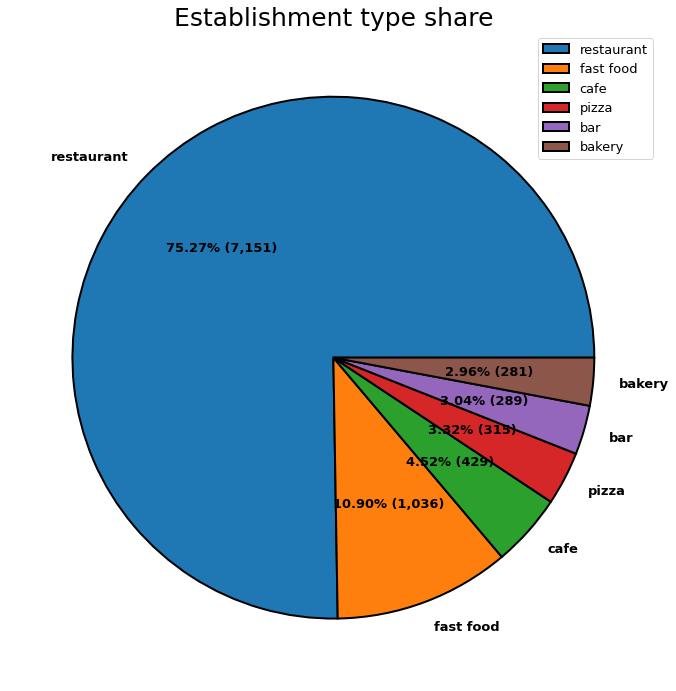

In [26]:
#drawing a pie:
plt.figure(figsize = (12,12))
plt.pie(rest['type'].value_counts(), labels = rest['type'].value_counts().index,
        autopct = lambda x : '{:.2f}% ({:,.0f})'.format(x,x * sum(rest['type'].value_counts())/100),
        wedgeprops={"edgecolor" : "k", 'linewidth' : 2}, textprops={'color' : 'k', 'fontsize': 13, 'fontweight' : 'bold'})
plt.title('Establishment type share', size = 25)
plt.legend(fontsize = 13)
plt.show()

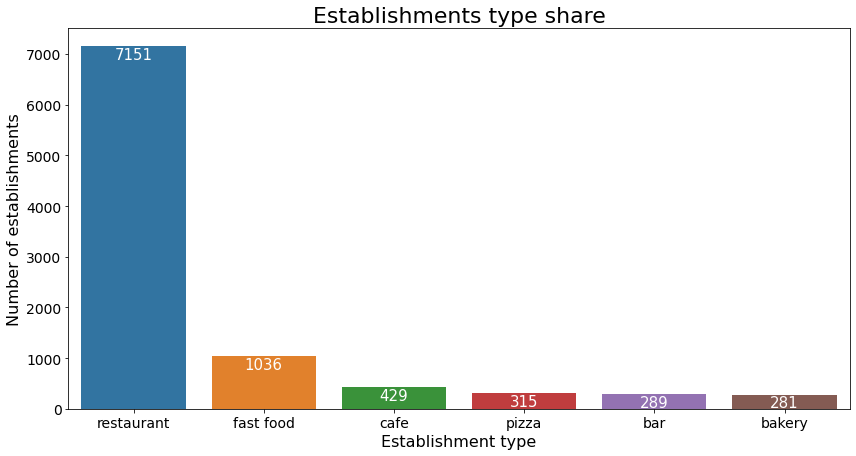

In [27]:
rest_type = rest['type'].value_counts().reset_index()
plt.figure(figsize = (14, 7))
typeshare = sns.barplot(data = rest_type, x = 'index', y = 'type')
for bar in typeshare.patches: 
    plt.annotate(format(bar.get_height().astype(int)), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha = 'center', va = 'bottom', size=15, xytext=(0, -16), textcoords='offset points', c = 'w')
plt.title('Establishments type share', fontsize = 22)
plt.xlabel('Establishment type', fontsize = 16)
plt.ylabel('Number of establishments', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### The majority of the establishment type is "Restaurant" with 75.17%.
- 11% is fast food.
- 14% of the shares split almost equally between "Cafe" (4.51%), pizza (3.32%), bar(3.03%), and bakery (2.93%).<br><br>
- "Restaurant" contains many different genres, it can be anything really, it can be asian, it can be pizza, italian, etc., this is probanly why the restaurant type is so big in comparison with the others.

<a id="chain"></a>
[Back to Analysis](#Analysis)

## Proportions of chain and nonchain establishments.

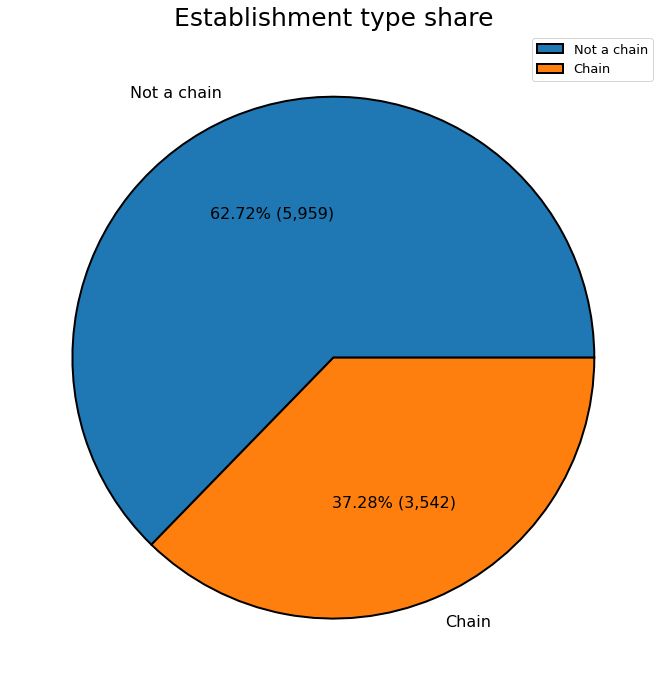

In [28]:
#drawing a pie:
plt.figure(figsize = (12,12))
plt.pie(rest['chain'].value_counts(), labels = ['Not a chain',  'Chain'],
        autopct = lambda x : '{:.2f}% ({:,.0f})'.format(x,x * sum(rest['type'].value_counts())/100),
        wedgeprops={"edgecolor" : "k", 'linewidth' : 2}, 
        textprops={'color' : 'k', 'fontsize': 16, 'fontweight' : 'medium'})
plt.title('Establishment type share', size = 25)
plt.legend(fontsize = 13)
plt.show()

### 69.9 of the establishments are independent.
There are countless differences between chain and independent businesses.
- For one, an independed restaurant owner may have more control and motivation to keep his business running, and attract customers.
- On the other side, chain restaurants are limited to the chain menu ,model and customers. 
- Also as opposed to independent businiesses, chain establishments do not vary in their style, food, etc., meaning you can only have one restaurant for each chain on a certain area of town. leaving much space to the large variety available for independent establishments.

<a id="type_of_chain"></a>
[Back to Analysis](#Analysis)

## Which type of establishment is typically a chain?

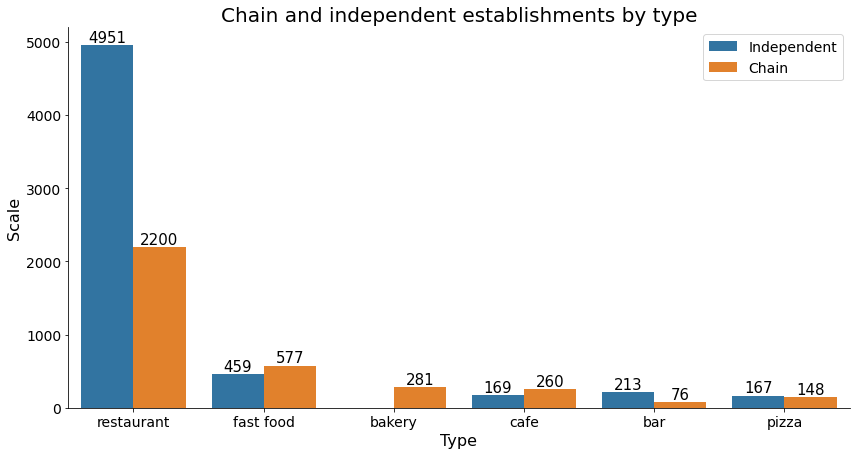

In [29]:
#creating table for plotting:
chain_type = (rest.pivot_table(index = ['chain', 'type'], values = ['id'], aggfunc = 'count') 
    .rename(columns = {'id': 'count'}).reset_index()                                          #renaming id column to count.
#    .append({'chain': 'False', 'type': 'bakery', 'count': 0}, ignore_index = True)            #appending empty bakery value.
    .sort_values('count', ascending = False))                                                 #sorting by count.

#drawing plot:
plt.figure(figsize = (14,7))
typeplot = sns.barplot(data = chain_type, x = 'type', y = 'count', hue = 'chain')
for bar in typeplot.patches: 
    plt.annotate(format(bar.get_height().astype(int)), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha = 'center', va = 'bottom', size=15, xytext=(0, 0), textcoords='offset points')
sns.despine(right = True)
plt.legend(typeplot.get_legend_handles_labels()[0], ['Independent', 'Chain'], fontsize = 14)
plt.title('Chain and independent establishments by type', size = 20)
plt.xlabel('Type', size = 16)
plt.ylabel('Scale', size = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### 4962 Restaurants are independent, this is more than double the chain restaurants.
It makes sense:
- As noted before; "Restaurant is a broad definition, it splits into many different types.
- Chain establishments are very suitable for fast food and deliveries. and less for hosting in comfort.

Notice that 100% of bakeries are chain, perhaps being part of a chain makes it easier to run this kind of business:
- A chain bakery does not need a kitchen. in some cases not even a stove to bake with!, they conviniently get their goods from the chain factory(or kitchen). this reduces the costs a great margin.
- As long as the chain is successful customers are easy to get.

Another interesting note is that the amount of independent and chain pizzas is very similar (167 - 153), one could expect chain pizza restaurants to be more popular.
- it could be quality ingredients, or the warm hospitality a chain may lack in.

<a id="chain_char"></a>
[Back to Analysis](#Analysis)

## What characterizes chains:<br>many establishments with a small number of seats or a few establishments with a lot of seats?

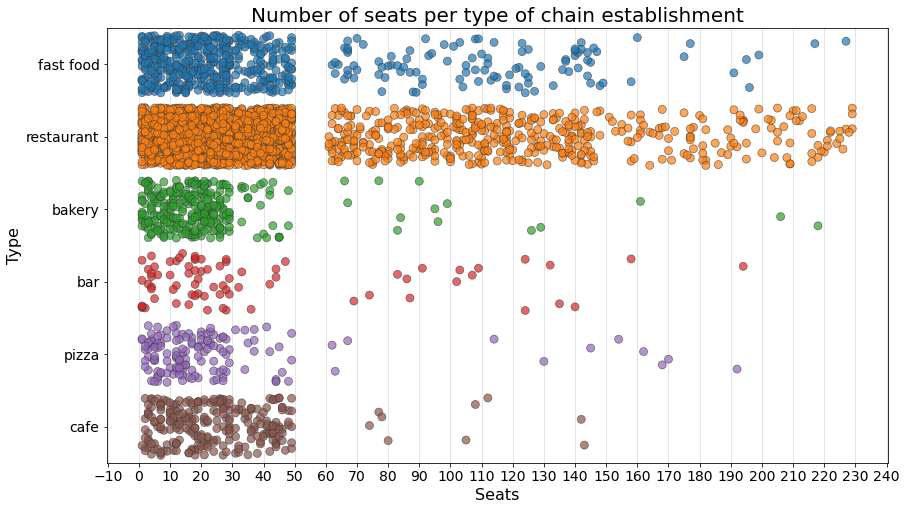

In [30]:
plt.figure(figsize = (14, 8))
sns.stripplot(y="type", x="seats", data=rest[rest['chain'] == True], size = 8, alpha = 0.7, jitter = 0.4, linewidth = 0.7)
plt.grid(axis = 'x', alpha = 0.4)
plt.title('Number of seats per type of chain establishment', size = 20)
plt.xlabel('Seats', size = 16)
plt.ylabel('Type', size = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.locator_params(axis="x", nbins=26)
plt.show()

In [31]:
(rest[rest['chain'] == True].groupby(['name', 'type']).agg({'name':'count', 'seats':'mean'})
                   .rename(columns = {'name':'chain_size', 'seats':'avg_seats'}).reset_index())

,name,type,chain_size,avg_seats
0,#1 chinese fast food,restaurant,1,6.0
1,1810 restaurant,restaurant,1,45.0
2,333,restaurant,1,180.0
3,3rd st market & deli,restaurant,1,7.0
4,4 caminos restaurant,restaurant,1,18.0
...,...,...,...,...
2072,zankou chicken,restaurant,2,53.5
2073,zen bakery (retail),bakery,1,19.0
2074,zermenos restaurant inc,restaurant,1,10.0
2075,zion market deli & island,restaurant,1,16.0


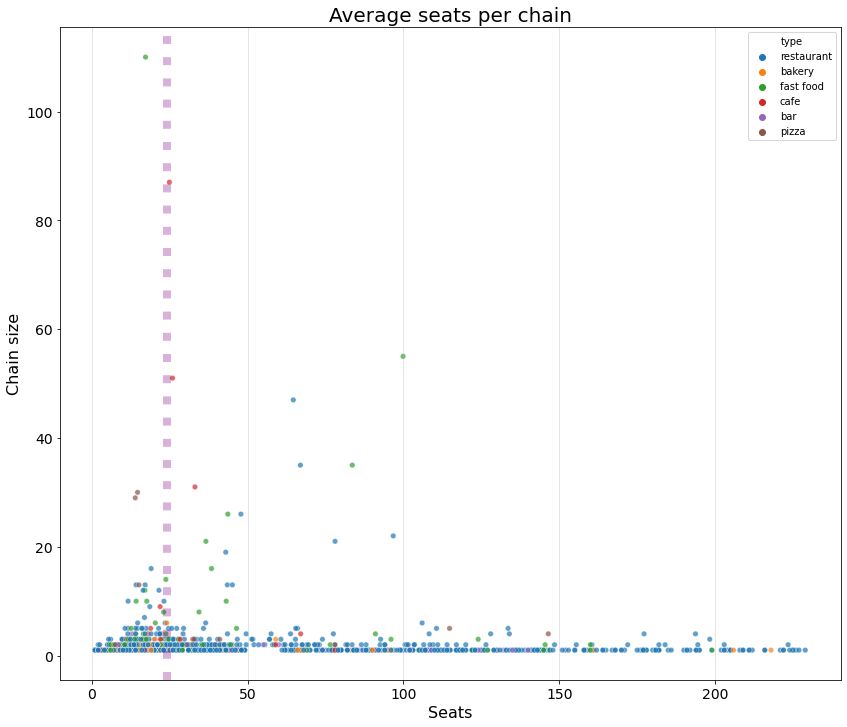

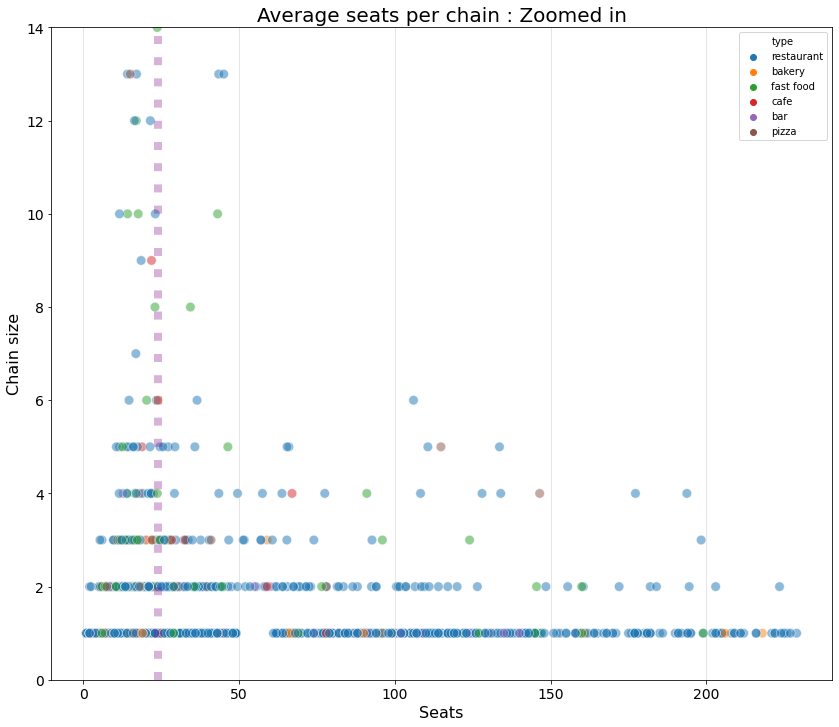

In [32]:
#gouping by chain, and finding chain size and average seats:
chain_avg_seats = (rest[rest['chain'] == True].groupby(['name', 'type']).agg({'name':'count', 'seats':'mean'})
                   .rename(columns = {'name':'chain_size', 'seats':'avg_seats'}).reset_index())

plt.figure(figsize = (14, 12))
sns.scatterplot(y = 'chain_size', x = 'avg_seats', data = chain_avg_seats, s = 30, alpha = 0.7, hue = 'type')
plt.grid(axis = 'x', alpha = 0.4)
#plt.ylim([0,14])
plt.axvline(x = chain_avg_seats['avg_seats'].median(), color='purple', linestyle=':', linewidth = 8, alpha = 0.3)
plt.title('Average seats per chain', size = 20)
plt.xlabel('Seats', size = 16)
plt.ylabel('Chain size', size = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

#lets do that again but look closer(ylim 0 to 14):  
plt.figure(figsize = (14, 12))
sns.scatterplot(y = 'chain_size', x = 'avg_seats', data = chain_avg_seats, s = 90, alpha = 0.5, hue = 'type')
plt.grid(axis = 'x', alpha = 0.4)
plt.ylim([0,14])
plt.axvline(x = chain_avg_seats['avg_seats'].median(), color='purple', linestyle=':', linewidth = 8, alpha = 0.3)
plt.title('Average seats per chain : Zoomed in', size = 20)
plt.xlabel('Seats', size = 16)
plt.ylabel('Chain size', size = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### The majority of establishments have up to 50 seats.
- However "restaurant" type have a broader distribution in the greater seats numbers, reaching over to 229 seats at maximum.<br> Fast food is a little less dense but similar to the "restaurant" type.
- There is an interesting gap, where there are no establishments with seat count between 50 and 60. maybe 50 is a golden number of seats? maybe a restaurant with 52 seats, would report to have 52 seats instead?, however we do not see the same behaviour in the 100 seats count for example.
- The chain bar establishments are the fewest, out of the small number of values it seems as there is a significantly bigger share of bars with many seats than the other types of establishments.
***
### Having checked average seat number and chain count we can add:
- Almost exlusively the only chains who dare go above the 100 seats are very small chains, this may be a reason why small chains remain small.
- Even the biggest chains don't dare go above 100 seats. and like all other establishments, the most stay within the safe limit of 50 seats.

<a id="avg_seats"></a>
[Back to Analysis](#Analysis)

## The average number of seats for each type of restaurant:
On average, which type of restaurant has the greatest number of seats?

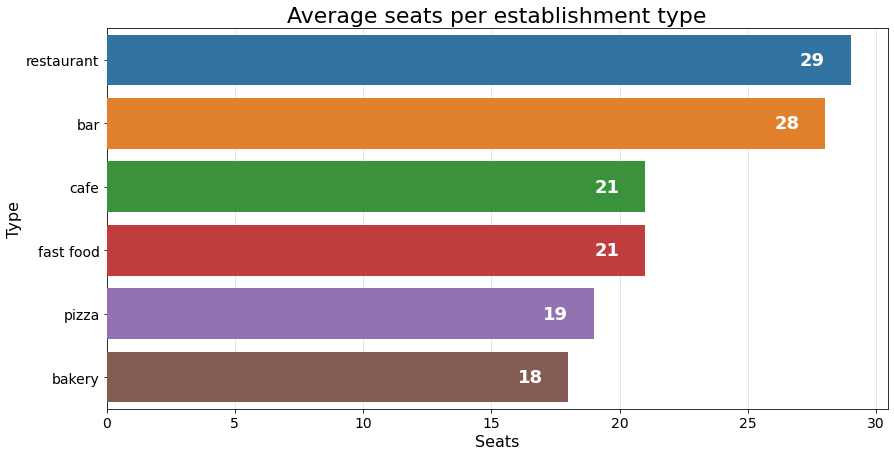

In [33]:
mean_seats = rest.groupby('type')['seats'].median().round().astype(int).reset_index().sort_values('seats', ascending = False)

plt.figure(figsize = (14, 7))
sns.barplot(data = mean_seats, y = 'type', x = 'seats', zorder = 3)
for index, value in enumerate(mean_seats['seats']):
    plt.text(value - 1, index, str(value), color = 'white', weight = 'bold', size = 18, ha = 'right', va = 'center')
plt.grid(axis = 'x', alpha = 0.4)
plt.locator_params(axis="x", nbins=12)
plt.title('Average seats per establishment type', fontsize = 22)
plt.xlabel('Seats', fontsize = 16)
plt.ylabel('Type', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Restaurant and bar type establishments lead with average of 48 and 45 seats.
- Bakeries and cafes have the lowest value of 22 and 25 seats on average.
- Perhaps restaurants and bars are required to host a large crowd for a longer time than any other type of establishment.

<a id="top10st"></a>
[Back to Analysis](#Analysis)

## Top ten streets by number of restaurants:

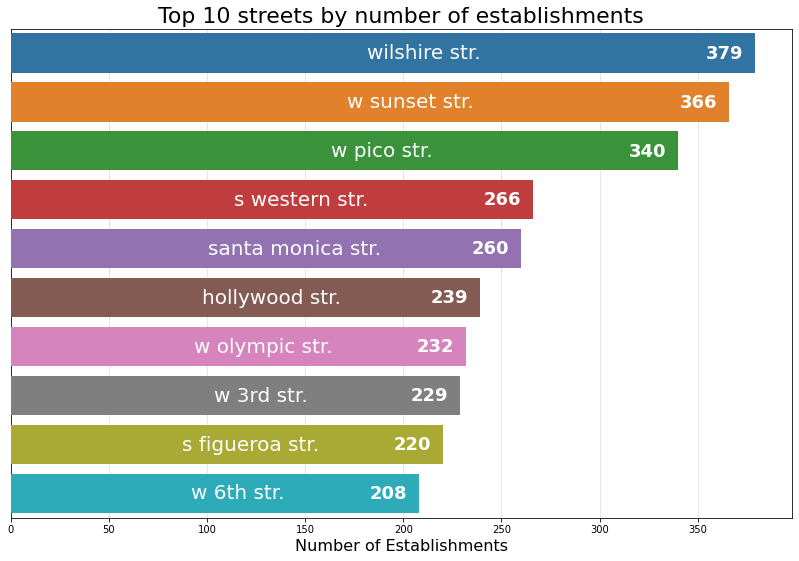

In [34]:
top10st = rest['street'].value_counts().head(10).reset_index().rename(columns = {'street':'count', 'index':'street'})

plt.figure(figsize = (14,9))
ax = sns.barplot(data = top10st, y= 'street', x = 'count', zorder = 3)
for bar, value in enumerate(top10st['count']):
    plt.text(value - 6, bar, str(value), color = 'white', weight = 'bold', size = 18, ha = 'right', va = 'center')
for bar, name in zip(ax.patches, top10st['street']):
    ax.text(bar.get_width() /1.8 , bar.get_y()+bar.get_height()/2, name + ' str.', color = 'white', size = 20, ha = 'center', va = 'center') 
plt.grid(axis = 'x', alpha = 0.4)
plt.title('Top 10 streets by number of establishments', fontsize = 22)
plt.xlabel('Number of Establishments', fontsize = 16)
plt.ylabel('', fontsize = 16)
plt.yticks([])

#plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

###  The street with highest number of establishments in Wilshire street with 380 establishments.
- Close behind are West Sunset street with 367, and West Pico street with 342 establishments. These are huge streets and are devided into regions.
- The rest of the top 10 streets have between 210 to 269 establishments.

<a id="st1rest"></a>
[Back to Analysis](#Analysis)

## Number of streets that only have one restaurant:

In [35]:
print('LA has 50,000 streets in total, of them {} streets have at least one restaurant, {} streets have only one restaurant.'
      .format(rest['street'].nunique(), rest['street'].value_counts().reset_index().query('street == 1')['street'].count()))

LA has 50,000 streets in total, of them 649 streets have at least one restaurant, 243 streets have only one restaurant.


### There are 243 streets that only have one restaurant in them.
- This calculation breaks large streets into geographic areas (such as west sunset), provided it is mentioned in the data (name).
- LA is a very large city with 50,000 streets. It is a big surprise that only so few streets have restaurants in them!.<br>
- A Restaurant (and most commercial businesses) needs to be in a an atractive and aprochable place with large traffic, otherwise it will be difficult for it to survive.<br>
- Also, there are city laws that must limit where a restaurant can exist limiting even more streets. it would be unusual for a restaurant to open in a low residential area for example.

<a id="seatdist"></a>
[Back to Analysis](#Analysis)

## Distribution of the number of seats in streets with a lot of restaurants:

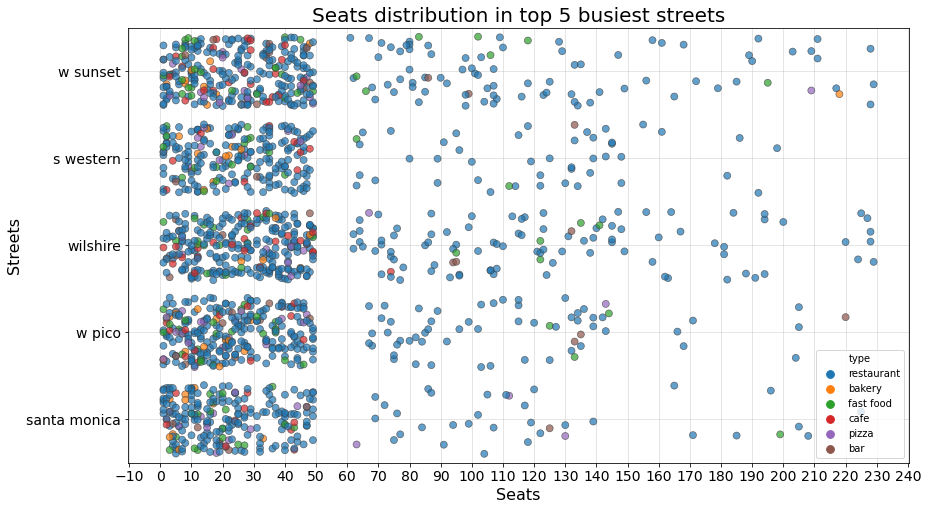

In [36]:
top10seats = rest[rest['street'].isin(top10st['street'].head())]

plt.figure(figsize = (14, 8))
sns.stripplot(y="street", x="seats", data = top10seats, size = 7, alpha = 0.7, jitter = 0.4, hue = 'type', linewidth = 0.7)
plt.grid(alpha = 0.4)
plt.title('Seats distribution in top 5 busiest streets', size = 20)
plt.xlabel('Seats', size = 16)
plt.ylabel('Streets', size = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.locator_params(axis="x", nbins=26)
plt.show()

### 1-50 seats is the seats number used in most establishments on the 5 busiest streets.
- There is that same strange gap between 50-60 seats.
- Reasons that the majority of establishments have 1-50 seats might be:
    - Space; especially on busy streets the area of restaurants may be limited due to high density, sqeeuzing in more venues in the same area will great higher profits.
    - Profit; a restaurant has to pay rent, the more seats it has the more space it takes and the bigger rent it pays.<br> there is no sense having so many seats if only few seats are used at any given time.

<a id="overall"></a>
[Back to Analysis](#Analysis)

[Back to Table of contents](#head)

# Analysis conclusions and recommendations:
Let us refer to our future cafe as **"Cafe Botz"**

- The majority (75%) of establishments type is a restaurant, but this resemnles a very large definition of many sub types like pizza, grill, etc. Fast food takes 11% of the types share, and cafe 4.5% slmost similar to the other types.<br>
    - **We should open Cafe Botz in a fast food type format.**
    
- 70% of the establishments do not belong to a chain. and 30% do belong to a chain, a chain of course will be more profitable for us as a company, but an individual business is easier to manage.
- There are slightly more chain businesses in the cafe and fast food type of restaurants (about 40%/60%).
    - **We should start Cafe Botz as an independent cafe, keeping in mind that when it is well established, we will create a chain of Cafe Botz, maybe even outside of LA!.**
- Only a few establishments have more than 60 seats, (and non has 50-60), But it seems that vast majority of establishments host up to 50 seats. The more seats the more space you need, and if most seats are occupied it's most profitable.
- Averagely, cafes have 29 seats, and fast food has 32.
    - **Cafe Botz should best aim to have no more than 30 seats. Even if all seats are constantly occupied we can expand when we are ready.**
- The three most business crowded streets are:
    - Willshire with 380 establishments.
    - West Sunset street with 367.
    - West Pico street with 342 establishments.
    - Any other street has below 269 establishments. (out of 50,000 streets in LA, only 243 streets have at least one restaurant.)
    - **Cafe Botz should be safe to open in either Willshire, west sunset, or west pico boulevards.***

### Table of Contents
- [Introduction](#head)
- [Import ibraries and data](#import)
- [A look at the data](#alookat)
    - [Conclusions: A look at the data](#alook_c)
- [Preprocessing](#prepro)
    - [Conclusions: Preprocessing](#preprocessing_c)
- [Analysis](#Analysis)
- [Overall conclusions and general recommendations](#overall)

<a id="linklink"></a>
[Back to Analysis](#Analysis)

[Back to Table of contents](#head)

### [link to the presentation](https://drive.google.com/file/d/1-ExBsjwyb4k9Yg_JiPrtFtqnTspVoxRW/view?usp=sharing)